Document Loaders are essential components used to load data from various sources into a format that can be processed by language models. They handle documents in diverse formats like PDFs, text files, web pages, databases, and more. Once the documents are loaded, they are typically broken down into smaller chunks and processed by the language models, enabling tasks such as document search, question answering, or summarization.

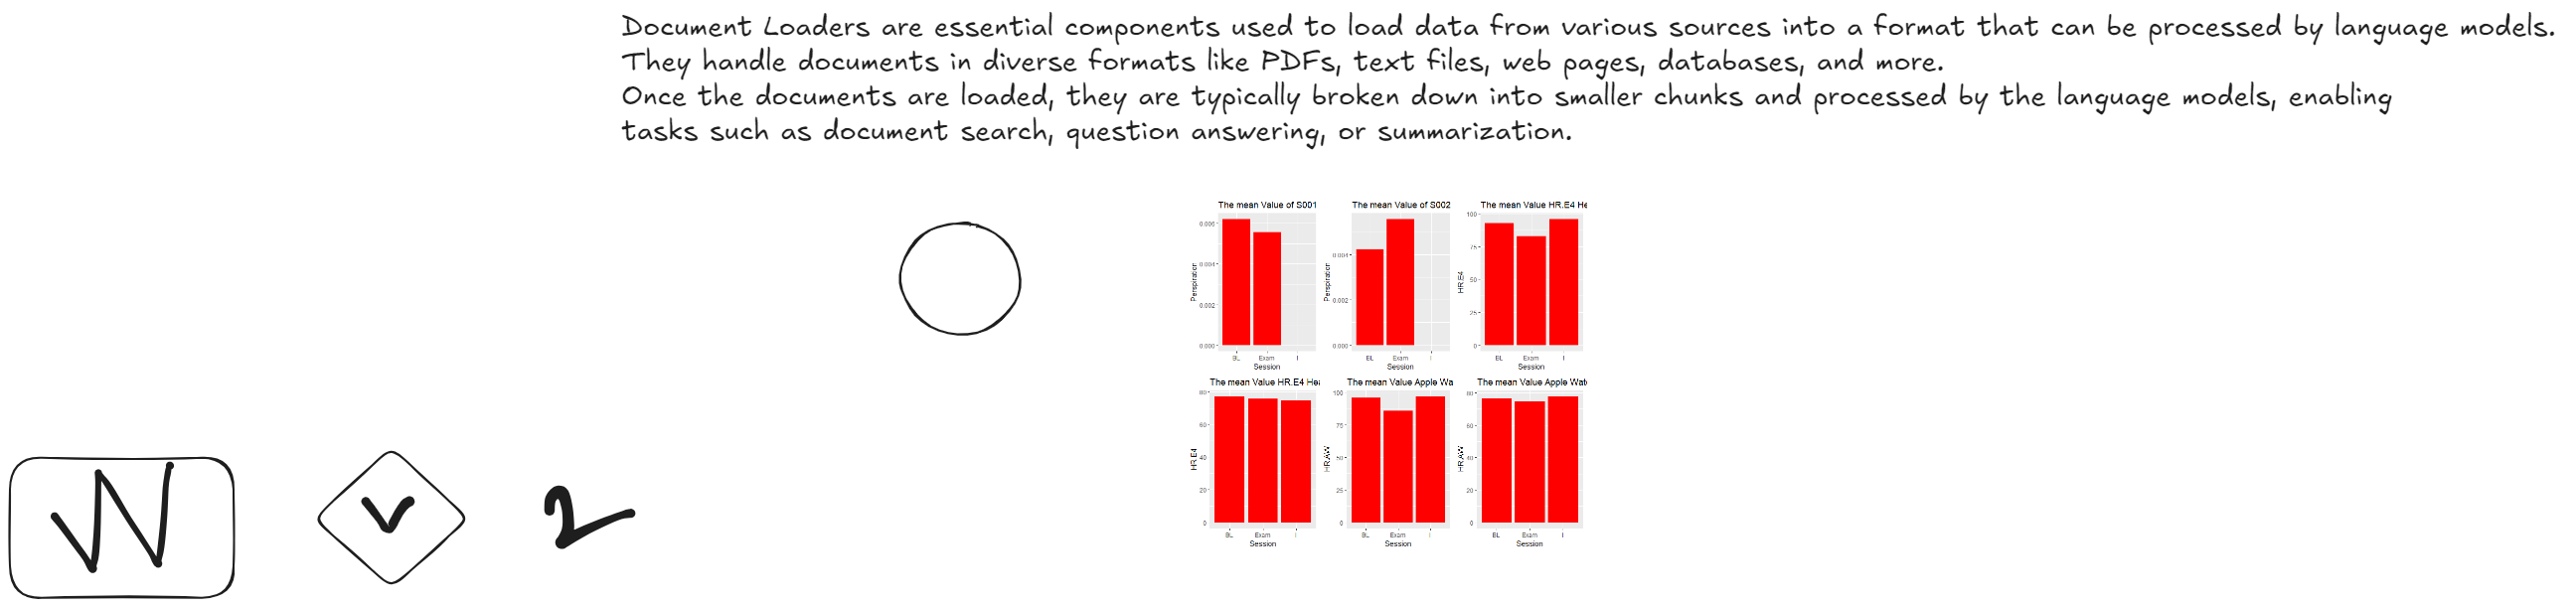

https://python.langchain.com/docs/integrations/document_loaders/

In [1]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("data/README.md")

document = loader.load()

document


[Document(metadata={'source': 'data/README.md'}, page_content='# Generative-AI\n\n```python\nprint("Hello world")\n\n```\n\n\nUse document loaders to load data from a source as `Document`\'s. A `Document` is a piece of text and associated metadata. For example, there are document loaders for loading a simple `.txt` file, for loading the text contents of any web page, or even for loading a transcript of a YouTube video.\n\nDocument loaders provide a "load" method for loading data as documents from a configured source. They optionally implement a "lazy load" as well for lazily loading data into memory.\n')]

API Link : https://python.langchain.com/api_reference/community/document_loaders.html

In [2]:
loader = TextLoader("data/sample.txt")

document = loader.load()

document

[Document(metadata={'source': 'data/sample.txt'}, page_content="LangChain is a popular framework designed to facilitate the development of applications that leverage language models (LLMs). It provides a streamlined way to integrate LLMs with various data sources, APIs, and external tools, enabling complex workflows and making it easier to build advanced AI applications.\n\nHereâ€™s an overview of its key features:\n\n### 1. **Chains**\n   - Chains allow you to link together multiple components, such as prompts and models, to create more sophisticated workflows.\n   - You can build sequential chains (step-by-step tasks) or custom chains depending on the application's needs.\n\n### 2. **Agents**\n   - Agents in LangChain are specialized modules that make decisions about which actions to take. They can autonomously call different tools or APIs based on user input.\n   - An agent could, for example, process a query by interacting with a search engine, perform calculations, or use APIs to 

In [5]:
document[0].page_content

"LangChain is a popular framework designed to facilitate the development of applications that leverage language models (LLMs). It provides a streamlined way to integrate LLMs with various data sources, APIs, and external tools, enabling complex workflows and making it easier to build advanced AI applications.\n\nHereâ€™s an overview of its key features:\n\n### 1. **Chains**\n   - Chains allow you to link together multiple components, such as prompts and models, to create more sophisticated workflows.\n   - You can build sequential chains (step-by-step tasks) or custom chains depending on the application's needs.\n\n### 2. **Agents**\n   - Agents in LangChain are specialized modules that make decisions about which actions to take. They can autonomously call different tools or APIs based on user input.\n   - An agent could, for example, process a query by interacting with a search engine, perform calculations, or use APIs to retrieve specific data.\n\n### 3. **Memory**\n   - LangChain su

In [6]:
document[0].metadata

{'source': 'data/sample.txt'}

In [8]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("data/python book.pdf")
docs = loader.load()
print(docs[0])
print("\n\n")
print(docs[0].metadata)
print("\n\n")

page_content='      
 Department of Physics    Introduction to Programming in Python         A Self-Study Course (Version 2.2 – October 2009)   ' metadata={'source': 'data/python book.pdf', 'page': 0}



{'source': 'data/python book.pdf', 'page': 0}





In [10]:
print(docs)
print(len(docs))

[Document(metadata={'source': 'data/python book.pdf', 'page': 0}, page_content='      \n Department of Physics    Introduction to Programming in Python         A Self-Study Course (Version 2.2 – October 2009)   '), Document(metadata={'source': 'data/python book.pdf', 'page': 1}, page_content='Page 2 of 63 Table of Contents 1 Chapter 1 - Introduction.....................................................................................................6 2 Chapter 2 - Resources Required for the Course.................................................................8 2.1 Programming Language.............................................................................................8 2.2 Computer Operating Systems....................................................................................8 2.3 Additional Libraries (Modules).................................................................................8 2.4 Editors.....................................................................

In [11]:
for doc in docs:
    print(doc.metadata)

{'source': 'data/python book.pdf', 'page': 0}
{'source': 'data/python book.pdf', 'page': 1}
{'source': 'data/python book.pdf', 'page': 2}
{'source': 'data/python book.pdf', 'page': 3}
{'source': 'data/python book.pdf', 'page': 4}
{'source': 'data/python book.pdf', 'page': 5}
{'source': 'data/python book.pdf', 'page': 6}
{'source': 'data/python book.pdf', 'page': 7}
{'source': 'data/python book.pdf', 'page': 8}
{'source': 'data/python book.pdf', 'page': 9}
{'source': 'data/python book.pdf', 'page': 10}
{'source': 'data/python book.pdf', 'page': 11}
{'source': 'data/python book.pdf', 'page': 12}
{'source': 'data/python book.pdf', 'page': 13}
{'source': 'data/python book.pdf', 'page': 14}
{'source': 'data/python book.pdf', 'page': 15}
{'source': 'data/python book.pdf', 'page': 16}
{'source': 'data/python book.pdf', 'page': 17}
{'source': 'data/python book.pdf', 'page': 18}
{'source': 'data/python book.pdf', 'page': 19}
{'source': 'data/python book.pdf', 'page': 20}
{'source': 'data/python

lazy loading refers to a technique where documents or data are loaded only when they are actually needed, rather than loading everything upfront. This is particularly useful when dealing with large datasets or files where loading everything at once would be inefficient or resource-intensive.

Lazy loading helps optimize performance by deferring the loading of documents until they are required, which can save both memory and processing time.

In [14]:
lazy_doc = loader.lazy_load()
print(lazy_doc)

<generator object PyPDFLoader.lazy_load at 0x0000029F2D9AAAB0>


In [16]:
for doc in lazy_doc:
    print(doc.metadata)
    print("-----------Content----------")
    print(doc.page_content)
    break

{'source': 'data/python book.pdf', 'page': 1}
-----------Content----------
Page 2 of 63 Table of Contents 1 Chapter 1 - Introduction.....................................................................................................6 2 Chapter 2 - Resources Required for the Course.................................................................8 2.1 Programming Language.............................................................................................8 2.2 Computer Operating Systems....................................................................................8 2.3 Additional Libraries (Modules).................................................................................8 2.4 Editors........................................................................................................................9 2.5 Where to do the Work................................................................................................9 2.6 Books...................................

CSV Data Loading

Load a CSV file into a list of Documents.

Each document represents one row of the CSV file. Every row is converted into a key/value pair and outputted to a new line in the document’s page_content.



In [17]:
from langchain_community.document_loaders import CSVLoader

loader = CSVLoader(file_path="data/train_and_test2.csv")


docs = loader.load()

docs

[Document(metadata={'source': 'data/train_and_test2.csv', 'row': 0}, page_content='Passengerid: 1\nAge: 22\nFare: 7.25\nSex: 0\nsibsp: 1\nzero: 0\nParch: 0\nPclass: 3\nEmbarked: 2\n2urvived: 0'),
 Document(metadata={'source': 'data/train_and_test2.csv', 'row': 1}, page_content='Passengerid: 2\nAge: 38\nFare: 71.2833\nSex: 1\nsibsp: 1\nzero: 0\nParch: 0\nPclass: 1\nEmbarked: 0\n2urvived: 1'),
 Document(metadata={'source': 'data/train_and_test2.csv', 'row': 2}, page_content='Passengerid: 3\nAge: 26\nFare: 7.925\nSex: 1\nsibsp: 0\nzero: 0\nParch: 0\nPclass: 3\nEmbarked: 2\n2urvived: 1'),
 Document(metadata={'source': 'data/train_and_test2.csv', 'row': 3}, page_content='Passengerid: 4\nAge: 35\nFare: 53.1\nSex: 1\nsibsp: 1\nzero: 0\nParch: 0\nPclass: 1\nEmbarked: 2\n2urvived: 1'),
 Document(metadata={'source': 'data/train_and_test2.csv', 'row': 4}, page_content='Passengerid: 5\nAge: 35\nFare: 8.05\nSex: 0\nsibsp: 0\nzero: 0\nParch: 0\nPclass: 3\nEmbarked: 2\n2urvived: 0'),
 Document(metada

YouTube Transcript

In [1]:
# %pip install --upgrade --quiet  youtube-transcript-api
# %pip install --upgrade --quiet  pytube

from langchain_community.document_loaders import YoutubeLoader

loader = YoutubeLoader.from_youtube_url(
    "https://www.youtube.com/watch?v=LAfrShnpVIk",
    add_video_info=False,
)

result = loader.load()
result

[]

In [2]:
loader = YoutubeLoader.from_youtube_url(
    "https://www.youtube.com/watch?v=LAfrShnpVIk",
    add_video_info=True,
)
loader.load()

[Document(metadata={'source': 'LAfrShnpVIk', 'title': 'What is Retrieval Augmented Generation (RAG) - Augmenting LLMs with a memory', 'description': 'Unknown', 'view_count': 33931, 'thumbnail_url': 'https://i.ytimg.com/vi/LAfrShnpVIk/hq720.jpg', 'publish_date': '2024-01-09 00:00:00', 'length': 580, 'author': "What's AI by Louis-François Bouchard"}, page_content="when using chat GPT you most probably have encountered responses like I'm sorry but as of my last knowledge update in January 2022 Etc or even responses that are not true at all this is where rag comes into play and says let me help you by injecting more knowledge or content into your interactions with an llm and help it answer the unknown and upcoming questions we hear llms prompts and rag Everywhere by now I think most of us know what an llm and the prompt is but did you know that right now rag is just as important as both of these and Powers most applications you may use involving a chatbot I recently did a poll on the learn

In [6]:
from langchain_community.document_loaders.youtube import TranscriptFormat

loader = YoutubeLoader.from_youtube_url(
    "https://www.youtube.com/watch?v=TKCMw0utiak",
    add_video_info=False,
    transcript_format=TranscriptFormat.CHUNKS,
    chunk_size_seconds=10,
)
print("\n\n".join(map(repr, loader.load())))

Document(metadata={'source': 'https://www.youtube.com/watch?v=TKCMw0utiak&t=0s', 'start_seconds': 0, 'start_timestamp': '00:00:00'}, page_content='♪ Hail to the victors valiant ♪')

Document(metadata={'source': 'https://www.youtube.com/watch?v=TKCMw0utiak&t=10s', 'start_seconds': 10, 'start_timestamp': '00:00:10'}, page_content='♪ Hail to the conquering heroes ♪ ♪ Hail, hail to Michigan ♪')

Document(metadata={'source': 'https://www.youtube.com/watch?v=TKCMw0utiak&t=20s', 'start_seconds': 20, 'start_timestamp': '00:00:20'}, page_content='♪ The leaders and best ♪')

Document(metadata={'source': 'https://www.youtube.com/watch?v=TKCMw0utiak&t=30s', 'start_seconds': 30, 'start_timestamp': '00:00:30'}, page_content='♪ Hail to the victors valiant ♪ ♪ Hail to the conquering heroes ♪')

Document(metadata={'source': 'https://www.youtube.com/watch?v=TKCMw0utiak&t=40s', 'start_seconds': 40, 'start_timestamp': '00:00:40'}, page_content='♪ Hail, hail to Michigan ♪ ♪ The champions of the west ♪ ♪ Ha

Recursive URL

The RecursiveUrlLoader lets you recursively scrape all child links from a root URL and parse them into Documents.

In [1]:
# %pip install -qU langchain-community beautifulsoup4

from langchain_community.document_loaders import RecursiveUrlLoader

loader = RecursiveUrlLoader(
    "https://docs.python.org/3.9/",
    timeout=10,
    max_depth=2,

)

docs = loader.load()
docs[0]

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\html\parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


Document(metadata={'source': 'https://docs.python.org/3.9/', 'content_type': 'text/html', 'title': '3.9.20 Documentation', 'language': None}, page_content='\n<!DOCTYPE html>\n\n<html xmlns="http://www.w3.org/1999/xhtml">\n  <head>\n    <meta charset="utf-8" /><title>3.9.20 Documentation</title><meta name="viewport" content="width=device-width, initial-scale=1.0">\n    \n    <link rel="stylesheet" href="_static/pydoctheme.css" type="text/css" />\n    <link rel="stylesheet" href="_static/pygments.css" type="text/css" />\n    \n    <script id="documentation_options" data-url_root="./" src="_static/documentation_options.js"></script>\n    <script src="_static/jquery.js"></script>\n    <script src="_static/underscore.js"></script>\n    <script src="_static/doctools.js"></script>\n    <script src="_static/language_data.js"></script>\n    \n    <script src="_static/sidebar.js"></script>\n    \n    <link rel="search" type="application/opensearchdescription+xml"\n          title="Search within 

In [2]:
docs[0].metadata

{'source': 'https://docs.python.org/3.9/',
 'content_type': 'text/html',
 'title': '3.9.20 Documentation',
 'language': None}

In [3]:
print(docs[0].page_content)


<!DOCTYPE html>

<html xmlns="http://www.w3.org/1999/xhtml">
  <head>
    <meta charset="utf-8" /><title>3.9.20 Documentation</title><meta name="viewport" content="width=device-width, initial-scale=1.0">
    
    <link rel="stylesheet" href="_static/pydoctheme.css" type="text/css" />
    <link rel="stylesheet" href="_static/pygments.css" type="text/css" />
    
    <script id="documentation_options" data-url_root="./" src="_static/documentation_options.js"></script>
    <script src="_static/jquery.js"></script>
    <script src="_static/underscore.js"></script>
    <script src="_static/doctools.js"></script>
    <script src="_static/language_data.js"></script>
    
    <script src="_static/sidebar.js"></script>
    
    <link rel="search" type="application/opensearchdescription+xml"
          title="Search within Python 3.9.20 documentation"
          href="_static/opensearch.xml"/>
    <link rel="author" title="About these documents" href="about.html" />
    <link rel="index" title="I

In [4]:
#%pip install lxml
import re

from bs4 import BeautifulSoup


def bs4_extractor(html: str) -> str:
    soup = BeautifulSoup(html, "html5lib")
    return re.sub(r"\n\n+", "\n\n", soup.text).strip()

In [6]:
content = bs4_extractor(docs[0].page_content)
print(content)

3.9.20 Documentation
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
      
    

    
    
      @media only screen {
        table.full-width-table {
            width: 100%;
        }
      }
    

            
             

  

    
    
        
    
    
         
             
         
        
        
            
                
            
            
            
        
    
    
        
            

Download
Download these documents

Docs by version

  
  Python 3.14 (in development)
  
  Python 3.13 (pre-release)
  
  Python 3.12 (stable)
  
  Python 3.11 (security-fixes)
  
  Python 3.10 (security-fixes)
  
  Python 3.9 (security-fixes)
  
  Python 3.8 (security-fixes)
  
  Python 3.7 (EOL)
  
  Python 3.6 (EOL)
  
  Python 3.5 (EOL)
  
  Python 3.4 (EOL)
  
  Python 3.3 (EOL)
  
  Python 3.2 (EOL)
  
  Python 3.1 (EOL)
  
  Python 3.0 (EOL)
  
  Python 2.7 (EOL)
  
  Python 2.6 (EOL)
  
  All versions

Other resour

In [7]:
loader = RecursiveUrlLoader("https://docs.python.org/3.9/", extractor=bs4_extractor)
docs = loader.load()
print(docs[1].page_content[:200])

C:\Users\hp\AppData\Local\Temp\ipykernel_18168\3029384019.py:8: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(html, "html5lib")
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\html\parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into th

Glossary — Python 3.9.20 documentation
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
      
    

    
    
      @media only screen {
      


In [8]:
print(docs[1].page_content)

Glossary — Python 3.9.20 documentation
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
      
    

    
    
      @media only screen {
        table.full-width-table {
            width: 100%;
        }
      }
    

            
             

  

    
    
        
    
    
         
             
         
        
        
            
                
            
            
            
        
    
    
        
            
  Previous topic
  “Why is Python Installed on my Computer?” FAQ
  Next topic
  About these documents
  
    This Page
    
      Report a Bug
      
        Show Source
        
      
    
  
        
    

  
    
      Navigation
      
        
          index
        
          modules |
        
          next |
        
          previous |

          
          Python »
          
            
            
          
          
              
          
    
      3.9.20 Documentation »


FireCrawl

FireCrawl crawls and convert any website into LLM-ready data. It crawls all accessible subpages and give you clean markdown and metadata for each. No sitemap required.

FireCrawl handles complex tasks such as reverse proxies, caching, rate limits, and content blocked by JavaScript. Built by the mendable.ai team.

https://www.firecrawl.dev/

In [10]:
from langchain_community.document_loaders import FireCrawlLoader
api_key = "fc-6bc21951e5eb4c8db24ccc90728855e6"
loader = FireCrawlLoader(url="https://python.langchain.com/docs/integrations/document_loaders/firecrawl/", mode = "crawl", api_key=api_key)

docs = loader.load()
docs

[Document(metadata={'ogUrl': 'https://python.langchain.com/docs/integrations/document_loaders/firecrawl/', 'title': 'FireCrawl | 🦜️🔗 LangChain', 'ogImage': 'https://python.langchain.com/img/brand/theme-image.png', 'ogTitle': 'FireCrawl | 🦜️🔗 LangChain', 'language': 'en', 'sourceURL': 'https://python.langchain.com/docs/integrations/document_loaders/firecrawl/', 'description': 'FireCrawl crawls and convert any website into LLM-ready data. It crawls all accessible subpages and give you clean markdown and metadata for each. No sitemap required.', 'ogDescription': 'FireCrawl crawls and convert any website into LLM-ready data. It crawls all accessible subpages and give you clean markdown and metadata for each. No sitemap required.', 'pageStatusCode': 200, 'ogLocaleAlternate': []}, page_content='[Skip to main content](#__docusaurus_skipToContent_fallback)\n\nShare your thoughts on AI agents. [Take the 3-min survey](https://langchain.typeform.com/state-of-agents).\n\n[![🦜️🔗 LangChain](https://

In [11]:
print(docs[0].page_content)

[Skip to main content](#__docusaurus_skipToContent_fallback)

Share your thoughts on AI agents. [Take the 3-min survey](https://langchain.typeform.com/state-of-agents).

[![🦜️🔗 LangChain](https://python.langchain.com/img/brand/wordmark.png)](/)[Integrations](/docs/integrations/platforms/) [API Reference](https://python.langchain.com/api_reference/)

More

- [Contributing](/docs/contributing/)
- [People](/docs/people/)
- * * *

- [LangSmith](https://docs.smith.langchain.com)
- [LangGraph](https://langchain-ai.github.io/langgraph/)
- [LangChain Hub](https://smith.langchain.com/hub)
- [LangChain JS/TS](https://js.langchain.com)

v0.3

- [v0.3](/docs/introduction/)
- [v0.2](https://python.langchain.com/v0.2/docs/introduction)
- [v0.1](https://python.langchain.com/v0.1/docs/get_started/introduction)

[💬](https://chat.langchain.com)  [GitHub repository](https://github.com/langchain-ai/langchain)

Search`` `K`

- [Providers](/docs/integrations/platforms/)

  - [Providers](/docs/integrations/p

ArxivLoader

arXiv is an open-access archive for 2 million scholarly articles in the fields of physics, mathematics, computer science, quantitative biology, quantitative finance, statistics, electrical engineering and systems science, and economics.

To access Arxiv document loader you'll need to install the arxiv, PyMuPDF and langchain-community integration packages. PyMuPDF transforms PDF files downloaded from the arxiv.org site into the text format.

In [1]:
#%pip install -qU langchain-community arxiv pymupdf

from langchain_community.document_loaders import ArxivLoader

# Supports all arguments of `ArxivAPIWrapper`
loader = ArxivLoader(
    query="Yolov8",
    load_max_docs=2,
    # doc_content_chars_max=1000,
    # load_all_available_meta=False,
    # ...
)

docs = loader.load()
print(docs[0])

page_content='SOD-YOLOv8 - Enhancing YOLOv8 for Small Object Detection in
Traffic Scenes
Boshra Khalili1 and Andrew W.Smyth2
Abstract— Object detection as part of computer vision can
be crucial for traffic management, emergency response, au-
tonomous vehicles, and smart cities. Despite significant ad-
vances in object detection, detecting small objects in images
captured by distant cameras remains challenging due to their
size, distance from the camera, varied shapes, and cluttered
backgrounds. To address these challenges, we propose Small
Object Detection YOLOv8 (SOD-YOLOv8), a novel model
specifically designed for scenarios involving numerous small
objects. Inspired by Efficient Generalized Feature Pyramid Net-
works (GFPN), we enhance multi-path fusion within YOLOv8
to integrate features across different levels, preserving details
from shallower layers and improving small object detection
accuracy. Additionally, a fourth detection layer is introduced
to utilize high-resolution spati

You can use summaries of Arvix paper as documents rather than raw papers

In [2]:
docs = loader.get_summaries_as_docs()
docs[0]

Document(metadata={'Entry ID': 'http://arxiv.org/abs/2408.04786v1', 'Published': datetime.date(2024, 8, 8), 'Title': 'SOD-YOLOv8 -- Enhancing YOLOv8 for Small Object Detection in Traffic Scenes', 'Authors': 'Boshra Khalili, Andrew W. Smyth'}, page_content='Object detection as part of computer vision can be crucial for traffic\nmanagement, emergency response, autonomous vehicles, and smart cities. Despite\nsignificant advances in object detection, detecting small objects in images\ncaptured by distant cameras remains challenging due to their size, distance\nfrom the camera, varied shapes, and cluttered backgrounds. To address these\nchallenges, we propose Small Object Detection YOLOv8 (SOD-YOLOv8), a novel\nmodel specifically designed for scenarios involving numerous small objects.\nInspired by Efficient Generalized Feature Pyramid Networks (GFPN), we enhance\nmulti-path fusion within YOLOv8 to integrate features across different levels,\npreserving details from shallower layers and imp